# Classification

## Logistic regression

## Dataset

* Features:
  * Most frequently mutated 20 genes and
  * 2 clinical features: gender and age at diagnosis
* Target variable (i.e, dependant variable or response variables): Glioma grade class information
  * 0 = “LGG”
  * 1 = “GBM”

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
# Download the test dataset
! curl https://naicno.github.io/BioNT_Module2_handson/_downloads/041231c291c25343976f8b70db54f238/TCGA_InfoWithGrade_scaled.csv -o TCGA_InfoWithGrade_scaled.csv
! ls -lh TCGA_InfoWithGrade_scaled.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 53487  100 53487    0     0   208k      0 --:--:-- --:--:-- --:--:--  208k
-rw-r--r--  1 pubuduss  staff    52K Jun  3 07:48 TCGA_InfoWithGrade_scaled.csv


In [3]:
# Create a DataFrame from the CSV file
gliomas = pd.read_csv('TCGA_InfoWithGrade_scaled.csv')
gliomas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Grade             839 non-null    int64  
 1   Gender            839 non-null    int64  
 2   Age_at_diagnosis  839 non-null    float64
 3   IDH1              839 non-null    int64  
 4   TP53              839 non-null    int64  
 5   ATRX              839 non-null    int64  
 6   PTEN              839 non-null    int64  
 7   EGFR              839 non-null    int64  
 8   CIC               839 non-null    int64  
 9   MUC16             839 non-null    int64  
 10  PIK3CA            839 non-null    int64  
 11  NF1               839 non-null    int64  
 12  PIK3R1            839 non-null    int64  
 13  FUBP1             839 non-null    int64  
 14  RB1               839 non-null    int64  
 15  NOTCH1            839 non-null    int64  
 16  BCOR              839 non-null    int64  
 1

In [4]:
# Inspect the first few rows of the DataFrame
gliomas.head()

,Grade,Gender,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,0.023233,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,-0.778400,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,-1.004616,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,-1.156913,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,-1.237841,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Count the number of samples in each grade (Count observations in target variable)
gliomas.groupby('Grade').size()

Grade
0    487
1    352
dtype: int64

## Visualize data distributions 

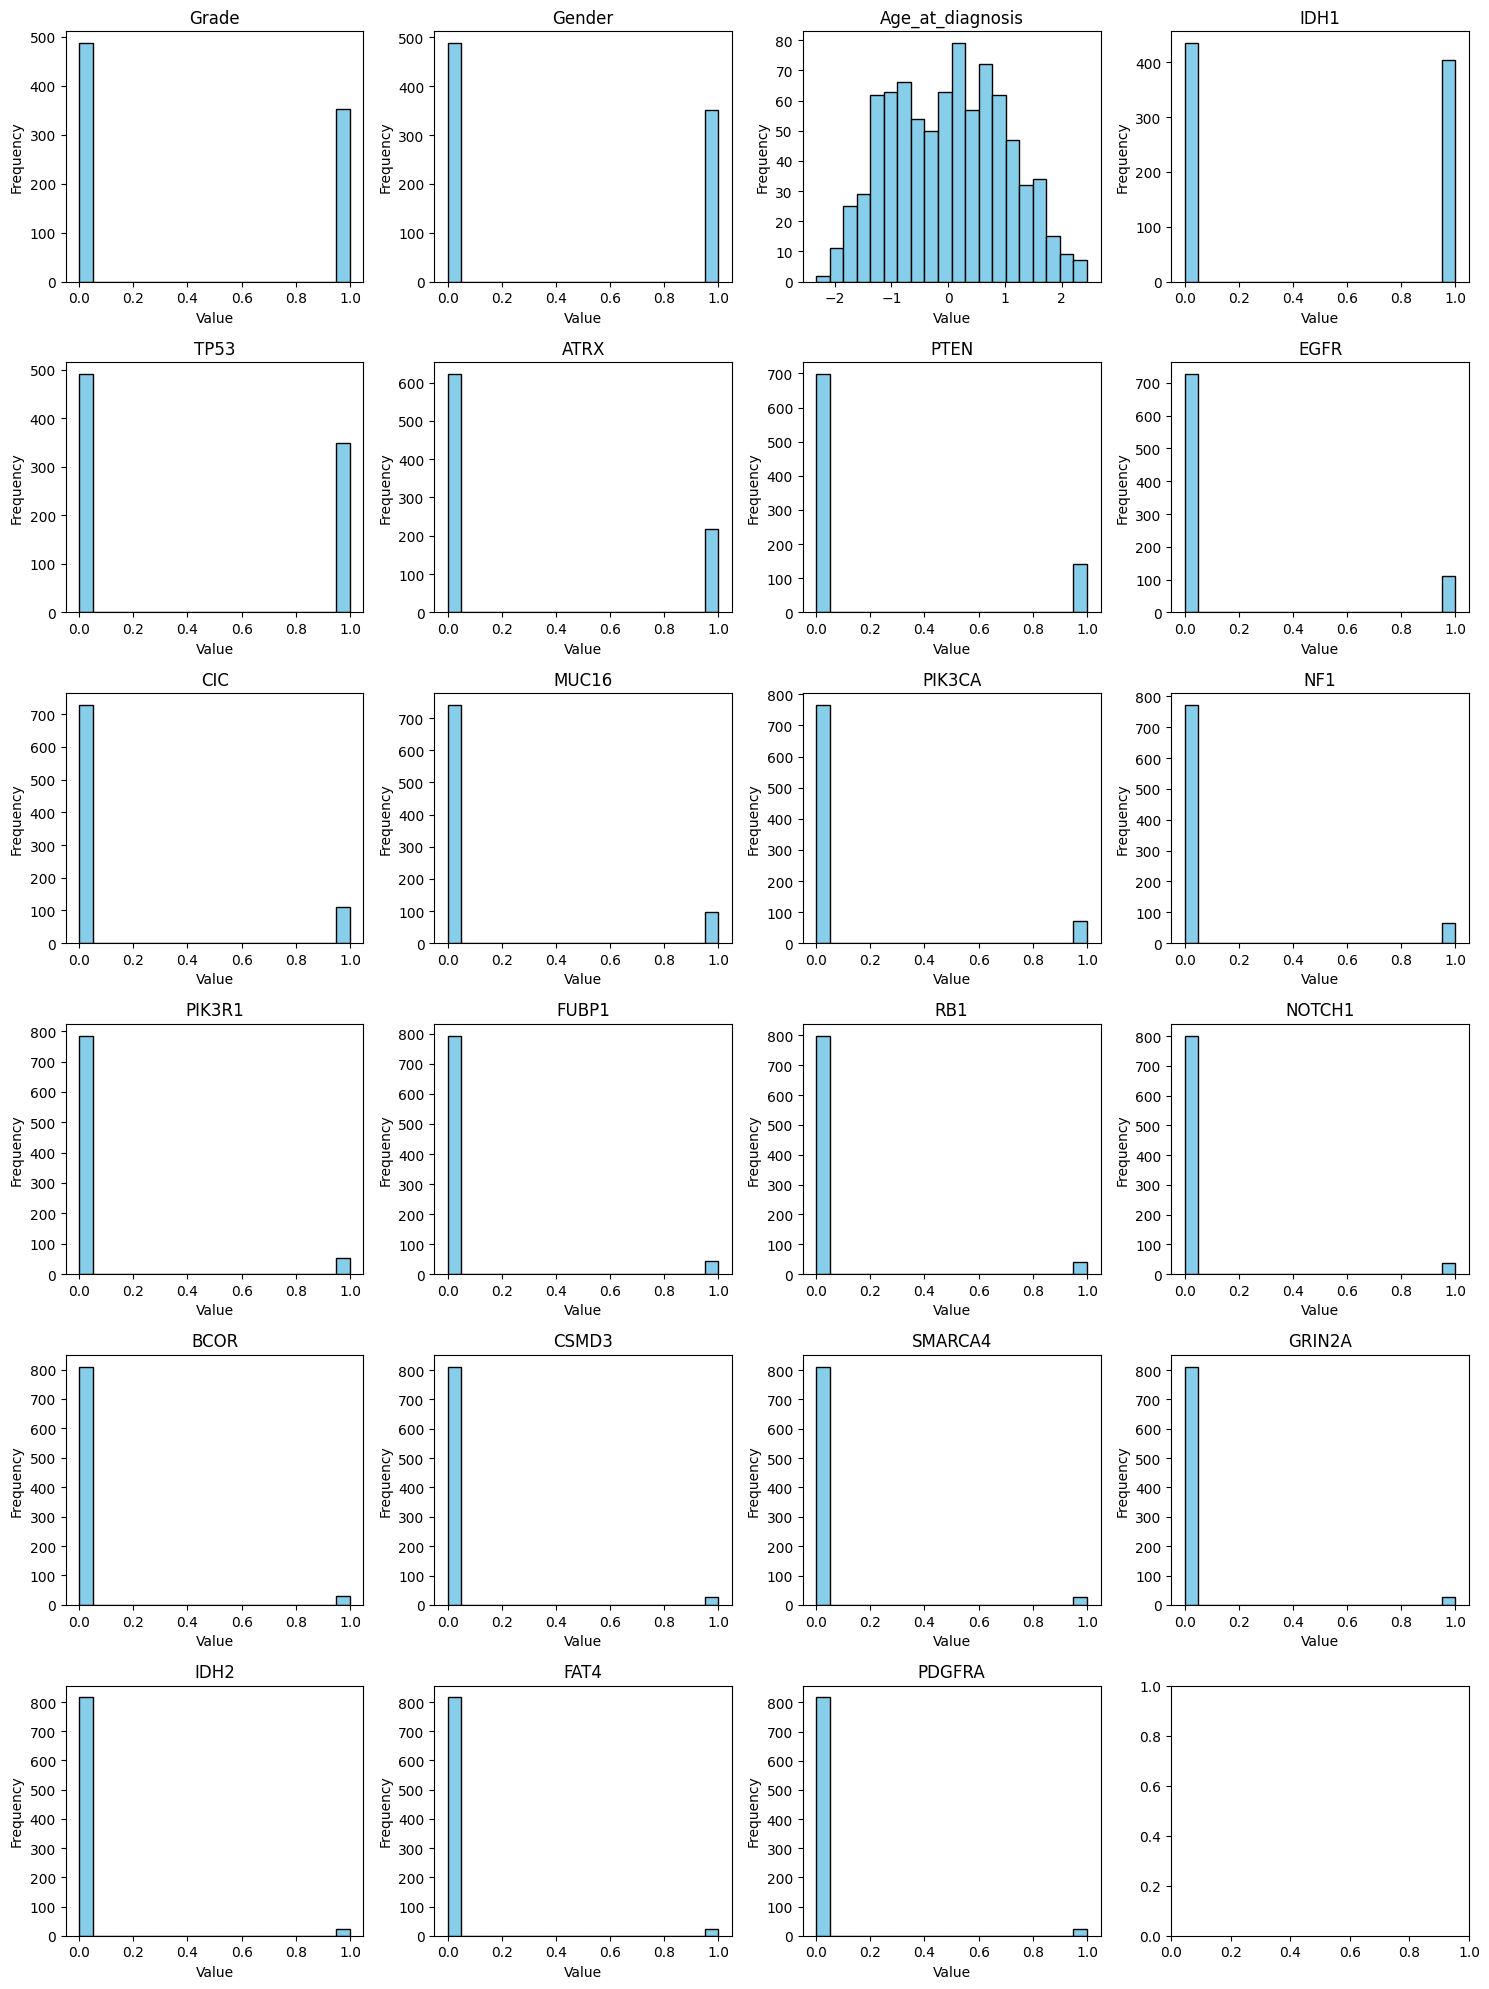

In [6]:
# Plot the distribution of data in all columns
fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(15, 20))
axs = axs.flatten()

# Iterate over each column and plot the distribution
for i, column in enumerate(gliomas.columns):
    axs[i].hist(gliomas[column], bins=20, color='skyblue', edgecolor='black')
    axs[i].set_title(column)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

* Scaling binary features would destroy their natural interpretability - coefficients would no longer represent the log-odds change from "absent" (0) to "present" (1)

Binary features encoded as 0/1 have a natural, meaningful interpretation where the coefficient represents the change in log-odds when the feature goes from absent (0) to present (1). If you scale these features (e.g., to have mean 0 and standard deviation 1), a "0" might become -0.85 and a "1" might become +1.23, making the coefficient interpretation much less intuitive. You'd lose the direct interpretation of "how much does the presence of this feature change the odds?" Additionally, binary features are already on a bounded, comparable scale (0 to 1), unlike continuous features that might range from 0 to 100,000, so scaling for convergence purposes is typically unnecessary.

In [7]:
gliomas.describe().T

,count,mean,std,min,25%,50%,75%,max
Grade,839.0,4.195471e-01,0.493779,0.000000,0.000000,0.000000,1.000000,1.000000
Gender,839.0,4.183552e-01,0.493583,0.000000,0.000000,0.000000,1.000000,1.000000
Age_at_diagnosis,839.0,1.016271e-16,1.000596,-2.326863,-0.820775,0.039163,0.756044,2.444061
IDH1,839.0,4.815256e-01,0.499957,0.000000,0.000000,0.000000,1.000000,1.000000
TP53,839.0,4.147795e-01,0.492978,0.000000,0.000000,0.000000,1.000000,1.000000
ATRX,839.0,2.586412e-01,0.438149,0.000000,0.000000,0.000000,1.000000,1.000000
PTEN,839.0,1.680572e-01,0.374140,0.000000,0.000000,0.000000,0.000000,1.000000
EGFR,839.0,1.334923e-01,0.340309,0.000000,0.000000,0.000000,0.000000,1.000000
CIC,839.0,1.323004e-01,0.339019,0.000000,0.000000,0.000000,0.000000,1.000000
MUC16,839.0,1.168057e-01,0.321380,0.000000,0.000000,0.000000,0.000000,1.000000


## Split original dataset

* `train_test_split` function from scikit-learn split a dataset into random train and test subsets
* Default behaviour,
  * Shuffles the data before splitting
  * Does not inherently preserve the distribution of the original dataset when splitting to train and test subsets 
  * The distribution in train and test subsets the depends on the randomness of the split
* Stratified sampling in `train_test_split` function ensures that the distribution of classes (e.g., LGG and GBM distribution) in original dataset is the same in split-datasets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    gliomas.drop("Grade", axis=1),
    gliomas["Grade"],
    test_size=0.3,
    random_state=42,
    stratify=gliomas["Grade"],
)

In [9]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (587, 22)
X_test (252, 22)
y_train (587,)
y_test (252,)


## Train a logistic regression model

In [10]:
# Initialize the Logistic Regression model
lr = LogisticRegression()
# Fit the model
lr.fit(X_train, y_train)

LogisticRegression()

### Logistic regression model

* Think of logistic regression as having three distinct layers that work together
  * The Raw Model (Linear Predictor)
  * The Model Output (Probability)
  * The Decision Boundary


#### The Raw Model (Linear Predictor)

$z = β0 + β1x1 + β2x2 + β3*x3$

Where:
* $z$ is the raw model output
  * Unbounded score that could be any real number from -∞ to +∞
* $β0$ is the intercept or bias term
* $β1, β2, β3$ are the coefficients or weights associated with features $x1, x2, x3$ respectively
* $x1, x2, x3$ are the values of the features

Additional notes:
* Raw model output of logistic regression is equal to the log-odds
* Why does this matter?
  * Improves interpretability: A one-unit increase in a feature increases the log-odds by the corresponding coefficient
* Homework: Explore mathematics relationship between "raw model output" and "log odds"


Text(0, 0.5, 'Count')

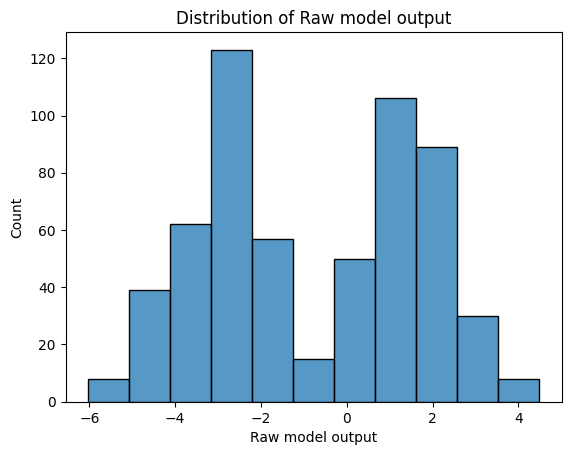

In [11]:
# Plot Raw model output histogram 
sns.histplot(lr.decision_function(X_train))
plt.title('Distribution of Raw model output')
plt.xlabel('Raw model output')
plt.ylabel('Count')

The `decision_function()` returns the raw linear combination: `β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ`. Since this is just a weighted sum of features, it has no mathematical bounds and can theoretically range from -∞ to +∞. The sigmoid function is then applied to transform these logits into probabilities between 0 and 1.

#### The Model Output (Probability)

* Raw score then gets transformed through the sigmoid function
* Sigmoid function: Converts our unbounded raw score into a probability between 0 and 1

In [12]:
# Access prediction probabilities
probabilities = lr.predict_proba(X_test)
print("Probabilities for first 5 test samples:")
print(probabilities[:5])
print("\nNote: Column 0 = P(class=0), Column 1 = P(class=1)")

Probabilities for first 5 test samples:
[[0.2877258  0.7122742 ]
 [0.30536037 0.69463963]
 [0.86905511 0.13094489]
 [0.24988542 0.75011458]
 [0.91616818 0.08383182]]

Note: Column 0 = P(class=0), Column 1 = P(class=1)


* `predict_proba()` returns a two-column array where Column 0 = P(class=0) = P(LGG) and Column 1 = P(class=1) = P(GBM) for each test patient. These probabilities sum to 1.0 for each patient
* In medical contexts, probability outputs are crucial because they provide confidence levels (e.g., "85% chance of GBM" vs "51% chance of GBM") that help clinicians make more informed treatment decisions and determine when additional testing might be needed.

Text(0, 0.5, 'Count')

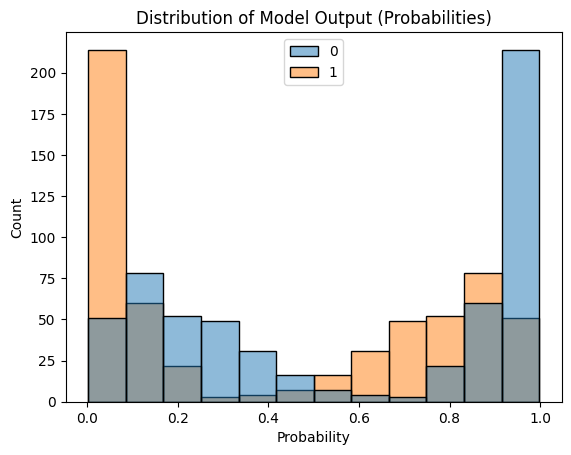

In [13]:
sns.histplot(lr.predict_proba(X_train))
plt.title('Distribution of Model Output (Probabilities)')
plt.xlabel('Probability')
plt.ylabel('Count')

*  If we're looking at the probability of class 0:
   *  Probability near 0.0 = low chance of being class 0 = likely class 1
   *  Probability near 1.0 = high chance of being class 0 = confident class 0 prediction
* A U-shaped probability distribution is actually desirable in logistic regression, indicating that the model can confidently distinguish between classes. Most predictions are either very likely class 0 (near 0.0) or very likely class 1 (near 1.0), with few ambiguous cases in between.
* Looking at the histogram, there are noticeably more blue bars (class 0 predictions) near probability 0.0 than orange bars (class 1 predictions) near probability 1.0, indicating the model predicts more instances as belonging to class 0.
* The model makes very confident predictions - most probabilities cluster at the extremes (0.0 and 1.0) with very few uncertain predictions in the middle ranges (0.3-0.7).


## Predict the Glioma type of the new dataset

In [14]:
# Predict classes for the test set
predicted_classes = lr.predict(X_test)
print("Predicted classes for first 10 samples:", predicted_classes[:10])


Predicted classes for first 10 samples: [1 1 0 1 0 1 1 0 1 0]


## Examine and understand the importance of features in predicting classes

### Coefficients of the model

* Magnitude of the coefficients indicates the relative importance of each feature on predicting positive class (in this case 1 - GBM)
* Larger coefficients imply a stronger influence on the predicted probability
* Interpretation of coefficients assumes that the features are independent of each other

In [15]:
# Get the list of features
feature_list = gliomas.columns[1:]
print("Number of Features", len(feature_list))
print("Features", feature_list)

Number of Features 22
Features Index(['Gender', 'Age_at_diagnosis', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR',
       'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1',
       'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA'],
      dtype='object')


In [16]:
# Create a DataFrame of the coefficients and their corresponding features
# `.coef_.` attribute of the fitted LogisticRegression model (`lr`) contains the coefficients for each feature
coefficients = pd.DataFrame(lr.coef_.T, index=feature_list, columns=['Coefficient'])
# Sort the coefficients
coefficients.sort_values(by='Coefficient', ascending=False)

,Coefficient
GRIN2A,1.055559
PIK3R1,0.947821
TP53,0.942698
PTEN,0.796895
Age_at_diagnosis,0.681210
MUC16,0.604221
PDGFRA,0.445061
BCOR,0.353871
CSMD3,0.273685
RB1,0.156207


<BarContainer object of 22 artists>

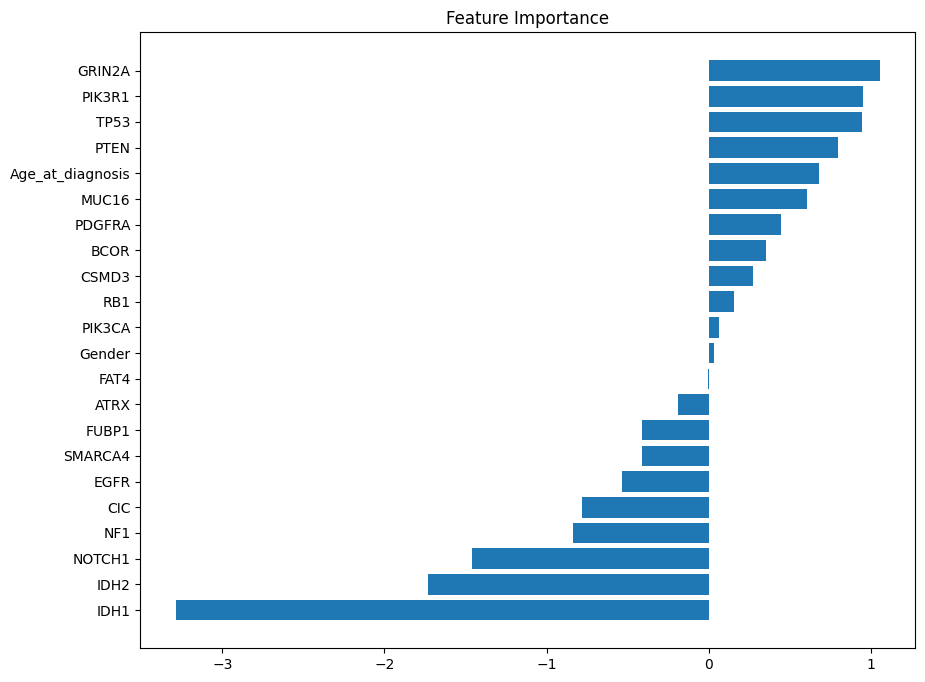

In [17]:
# Plot coefficients for each feature
plt.figure(figsize=(10, 8))
plt.title('Feature Importance')

plt.barh('index', 'Coefficient', align='center', data=coefficients.sort_values(by='Coefficient', ascending=True).reset_index())

* In logistic regression,
  * positive coefficients (like GRIN2A ~+1.0) increase the log-odds and therefore the probability of the positive class when the feature value increases
  * Negative coefficients (like IDH1 ~-3.0) decrease the log-odds and probability of the positive class
* The direction of the bar indicates whether the feature pushes predictions toward or away from the positive class.

## Evaluation of the model performance

* Confusion matrix

### Confusion matrix

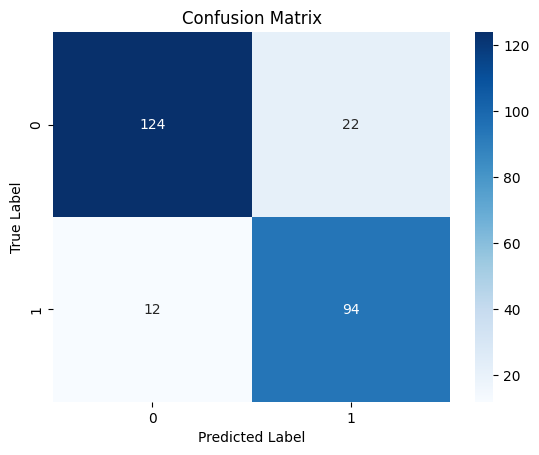

In [18]:
# Compute confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()